In [1]:
import numpy as np
import matplotlib.pyplot as plt
from chisq import EclipseFit

In [2]:
fit = EclipseFit('5095')
# planet phase shouldn't matter, so I don't compute it correctly
tp = 158.9
# Orbital solution from Borkovits et al. 2016, assuming equal mass binary
borko = [18.61196, 66.8735, np.radians(86), 0.05, np.radians(270),
         236.26, tp, 0.071*np.cos(np.radians(324)), 0.071*np.sin(np.radians(324)), np.radians(73), np.radians(39),
         1.0, 1.0, 0.018, 0.0, 0.0, 0.0]

# Orbital solution from Getley et al. 2017
getley = [18.61196, 66.8735, np.radians(80), 0.246, np.radians(22.82),
          237.70817, tp, 0.0604*np.cos(np.radians(27.67)), 0.0604*np.sin(np.radians(27.67)), np.radians(105.92), np.radians(64.19 - 305.54),
          1.21, 0.51, 7.698/1047.5, 0.0, 0.0, 0.0]

chain : np.ndarray = np.load('mcmc_out/5095_chains_1.npy')
prob = np.load('mcmc_out/5095_probs_1.npy')
ndim = chain.shape[-1]
best_indx = prob.flatten()[np.nonzero(prob.flatten())].argmax()
us = chain.reshape(-1, ndim)[best_indx].copy()

In [5]:
def i_diff(x):
    sim = fit.set_up_sim(x)
    sim.integrate(66.87)
    i_initial = sim.particles[1].inc
    sim.integrate(1433.12)
    i_final = sim.particles[1].inc
    return np.degrees(i_final - i_initial)

print(i_diff(getley))
print(i_diff(borko))
print(i_diff(us))

0.26980654389742464
-0.5294049935872065
0.00033858282032339177


Text(0, 0.5, 'Impact parameter')

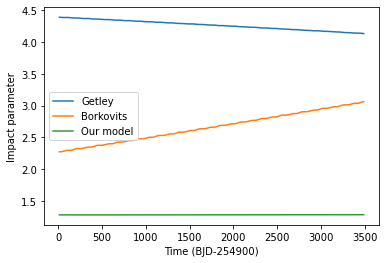

In [4]:
ecl_model, rv_model = fit.get_residuals(np.array(getley))
ax = ecl_model['A'].plot('model_t', 'model_b', label='Getley')
ecl_model, rv_model = fit.get_residuals(np.array(borko))
ecl_model['A'].plot('model_t', 'model_b', ax=ax, label='Borkovits')
ecl_model, rv_model = fit.get_residuals(np.array(us))
ecl_model['A'].plot('model_t', 'model_b', ax=ax, label='Our model')
plt.xlabel('Time (BJD-254900)')
plt.ylabel('Impact parameter')